# 1 Introducción

El siguiente ejercicio aplica diversos filtros a una imagen que es pasada por parametro utilizando OpenCL. Tambien tiene la posiblidad de detectar el texto en una imagen y pasarlo a texto (real para poder ser copiado) gracias a "Tesseract".

---
# 2 Armado del ambiente
Toma la dirección web de 1 imagen con acceso público en internet, la deja disponible al contexto de ejecución del cuaderno colab. Ademas ofrece la posibilidad de elegir si se interpretar el texto de la imagen.

In [3]:
#@title ## 2.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_imagen = "https://github.com/bustamanteandres/BustamanteSOA/blob/main/HPC/texto1.png?raw=true" #@param {type:"string"}
#@markdown ---
#@markdown #### Se desea interpretar el texto de la imagen?
img_texto =  True#@param {type:"boolean"}
#@markdown ---

!wget {url_imagen} -O imagen.jpg


--2020-12-01 01:57:38--  https://github.com/bustamanteandres/BustamanteSOA/blob/main/HPC/texto1.png?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bustamanteandres/BustamanteSOA/raw/main/HPC/texto1.png [following]
--2020-12-01 01:57:38--  https://github.com/bustamanteandres/BustamanteSOA/raw/main/HPC/texto1.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bustamanteandres/BustamanteSOA/main/HPC/texto1.png [following]
--2020-12-01 01:57:38--  https://raw.githubusercontent.com/bustamanteandres/BustamanteSOA/main/HPC/texto1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... con

---
## 2.2 Instala en el cuaderno el módulo OpenCV y Tesseract-OCR de Python.

In [5]:
!pip install opencv-python
!sudo apt install tesseract-ocr
!pip install pytesseract
pytesseract.pytesseract.tesseract_cmd = (
  r'/usr/bin/tesseract'
)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


# 3 Desarrollo

Imagen original: imagen.jpg -P- [252, 961]


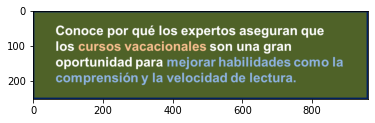

Imagenes con filtro


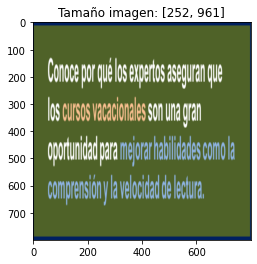

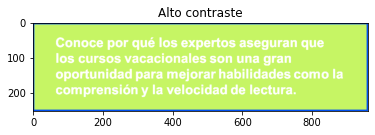

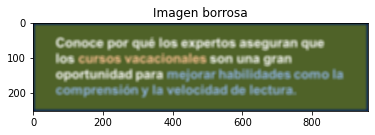

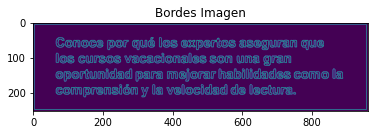

Texto extraido:  Conoce por qué los expertos aseguran que
los cursos vacacionales son una gran
oportunidad para mejorar habilidades como la
comprension y la velocidad de lectura.



In [30]:
try:
  from datetime import datetime
  import  matplotlib.pyplot as plt
  import cv2
  import numpy
  import pytesseract
  from PIL import Image

  #@markdown ---
  #@markdown ### Seleccione el tamaño de la imagen
  alto_param =  800 #@param {type:"integer"}
  ancho_param = 800 #@param {type:"integer"}
  #@markdown ---

  tiempo_total = datetime.now()
  # Cargo las imagenes guardadas en el "Armado del ambiente"
  img = cv2.imread("imagen.jpg")
  img = img[:,:,::-1]
  
  # Obtengo dimensiones de ambas imagenes
  image = Image.open("imagen.jpg")
  img_alto, img_ancho = image.size
  
  # Muestro los atributos de la imagen
  print("Imagen original: " + "imagen.jpg" + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto) + "]" )
  # Muestro como se ven la imagen original.
  plt.imshow(img)
  plt.show()

  print("Imagenes con filtro")
  # Aplico distintos filtros a la imagen original.
  img_tamaño = cv2.resize(img, (ancho_param, alto_param))
  img_contraste = cv2.addWeighted(img, 2.5, numpy.zeros(img.shape, img.dtype), 0, 0)
  img_borrosa = cv2.blur(img,(10,10))
  img_borde = cv2.Canny(img,50,100)

  # Muestro todas las imagenes con filtros.
  tamaño_text = "Tamaño imagen: [" + str(img_ancho) + ", " + str(img_alto) + "]"
  plt.imshow(img_tamaño), plt.title(tamaño_text)
  plt.show()
  plt.imshow(img_contraste), plt.title('Alto contraste')
  plt.show()
  plt.imshow(img_borrosa), plt.title('Imagen borrosa')
  plt.show()
  plt.imshow(img_borde), plt.title('Bordes Imagen')
  plt.show()
  # Se interpreta el texto en la imagen y se muestra
  if img_texto:
    texto = pytesseract.image_to_string(Image.open("imagen.jpg"))
    print("Texto extraido: ", texto)
  tiempo_total = datetime.now() - tiempo_total
except Exception as excep:
  print("Error: ", excep)

---
# 4 Tabla de pasos de ejecución del programa


 Procesador | Funciòn | Detalle
------------|---------|----------
CPU      |  @param                | Lectura de la direccion URL de la imagen (jpg) a procesar.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  @param                | Lectura del ancho y alto de imagen para uno de los filtros.
CPU      |  cv2.imread()          | Abre los archivos de las imagenes.
CPU      |  img[:,:,::-1]         | Convierte el formato de la imagen de BGR a RGB
CPU      |  print()               | Informa los atributos de la imagen.
CPU      |  plt.imshow            | Muestra la imagen original.
CPU      |  cv2.resize()          | Cambia el tamaño de la imagen original con los parametros pasados.
CPU      |  cv2.addWeighted()     | Agrega alto contraste a la imagen original.
CPU      |  cv2.blur()            | Vuelve borrosa a la imagen original
CPU      |  cv2.Canny()           | Dibuja los bordes/contorno de la imagen original.
CPU      |  plt.imshow            | Muestra las imagenes resultados (con filtros).
CPU      |  pytesseract.image_to_string  | Interpreta el texto que hay en la imagen original.
CPU      |  print()               | Muestra el texto interpretado.


---
# 5 Conclusiones
### Breve repaso
El siguiente ejercicio aplica diversos filtros a una imagen que es pasada por parametro utilizando la biblioteca OpenCL. Tambien tiene la posiblidad de detectar el texto en una imagen y pasarlo a texto (real para poder ser copiado) gracias a "Tesseract".

### Lecciones aprendidas
Como conclusion podemos observar que la biblioteca OpenCV nos proporciona muchas herramientas para aplicar diversos filtros a imagenes. Ademas, tambien podemos observar el poder de "Google Tesseract" al permitirnos obtener texto (listo para ser copiado) a traves del texto interpretado en una imagen.

### Sugerencias para continuar
El ejercicio se podria continuar agregando distintos tipos de filtros que nos ofrece OpenCL o tambien, agregando mas imagenes con texto para observar mejor el funcionamiento de "Google Tesseract".

---
# 6 Bibliografía


[1] MARKDOWN SYNTAX Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

[2] Introducción a Python: [Página Colab](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb) 

[3] Tutorial Point Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)
